<a href="https://colab.research.google.com/github/suhashgampa1/Machine_Learning/blob/main/DecisionTreesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,       # 1000 samples
    n_features=20,        # 20 features
    n_informative=10,     # 10 informative features
    n_redundant=5,        # 5 redundant features
    n_classes=2,          # Binary classification
    random_state=42       # for reproducibility
)

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

display(df.head())
print(f"Dataset shape: {df.shape}")

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,1.470848,-0.360450,-0.591602,-0.728228,0.941690,1.065964,0.017832,-0.596184,1.840712,-1.497093,...,-0.603968,2.899256,0.037567,-1.249523,0.257963,0.416628,1.408208,-1.838041,-0.833142,1
1,4.513369,-2.227103,-1.140747,2.018263,-2.238358,-0.497370,0.714550,0.938883,-2.395169,0.159837,...,1.461499,3.954171,0.309054,0.538184,-7.157865,-4.532216,-0.081800,-9.325362,0.574386,1
2,-2.355643,2.218601,-1.603269,0.873394,0.401483,0.717264,-0.859399,-1.042190,-2.175965,0.980231,...,0.544434,-2.466258,-0.470256,0.073018,-2.203531,-2.299263,-1.742761,-0.271579,-0.359285,0
3,-1.596198,-0.857427,1.772434,-0.639361,1.419409,-0.438525,0.281949,2.345145,1.006230,0.389135,...,-1.025051,-2.422975,1.579807,-0.300713,4.267120,2.893775,1.236697,6.034785,-0.045711,0
4,2.840049,-2.489600,-0.844902,-1.594362,-4.688517,0.459637,0.913607,-1.143505,1.263937,-2.040928,...,4.176424,1.341742,0.133565,1.743819,1.531188,2.269808,0.053489,-3.151109,1.603702,0


Dataset shape: (1000, 21)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (750, 20)
Testing set shape: (250, 20)


In [ ]:
# Initialize the Decision Tree Classifier
dtree_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dtree_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully!")

Decision Tree Classifier trained successfully!


In [ ]:
# Make predictions on the test set
y_pred = dtree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8200
Precision: 0.8293
Recall: 0.8095
F1-Score: 0.8193

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       124
           1       0.83      0.81      0.82       126

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



Finally, let's visualize a portion of the decision tree to understand its structure and how it makes decisions. For larger trees, this might only show a subset of the tree for clarity.

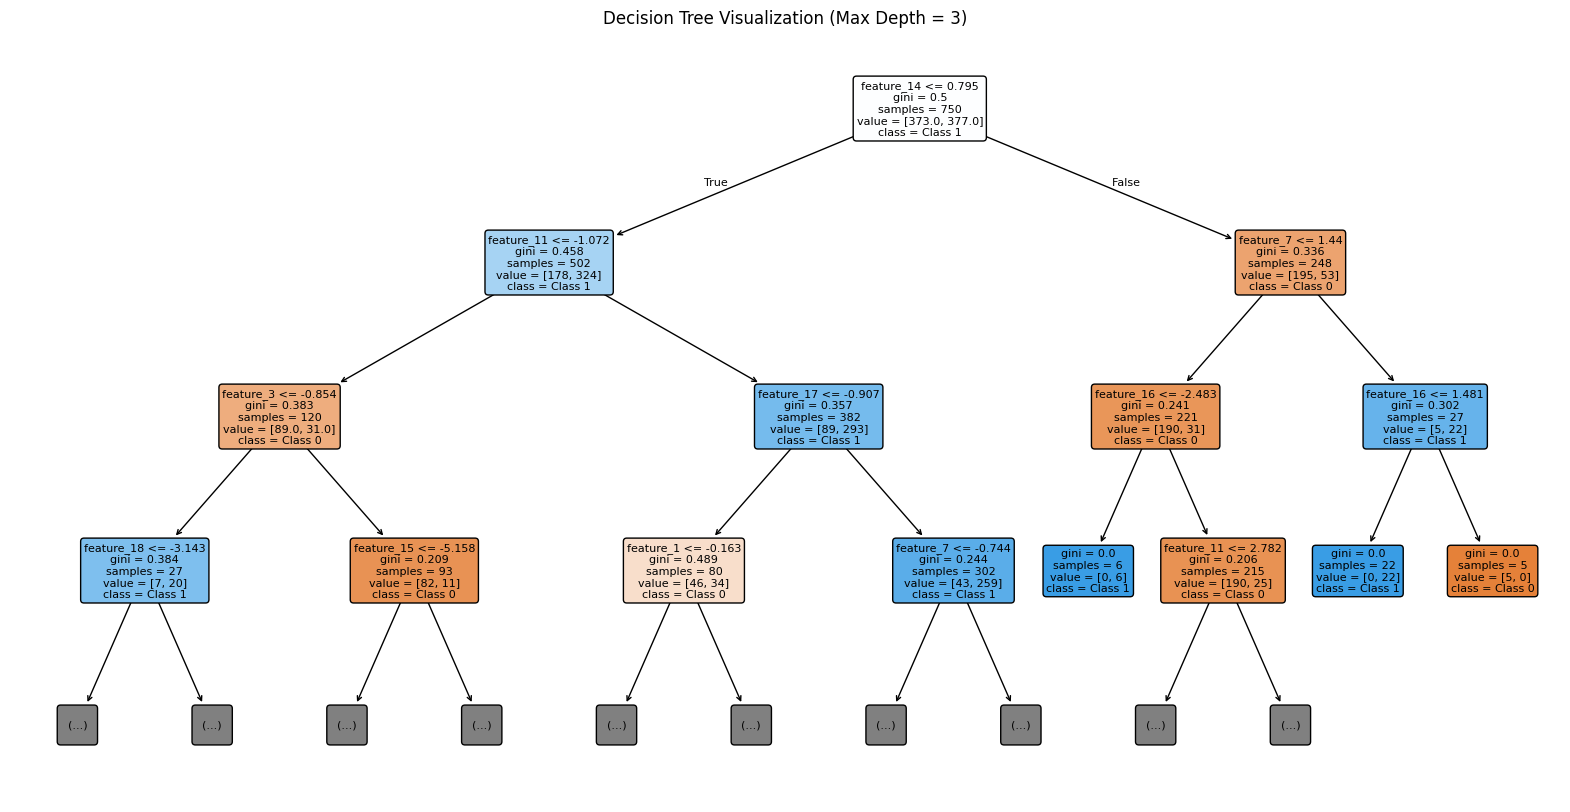

In [ ]:
# Visualize the decision tree (limiting depth for readability)
plt.figure(figsize=(20, 10))
plot_tree(dtree_classifier,
          feature_names=[f'feature_{i}' for i in range(X.shape[1])],
          class_names=['Class 0', 'Class 1'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3) # Limit depth to 3 for better visualization
plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()